##We begin by reading in the data and merging the training set with the outcome variable which we want to predict.

In [0]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# load data (saved to my github account)
url = "https://raw.githubusercontent.com/Matiki/Springboard/master/Capstone_1/data/trainvalues.csv"
train = pd.read_csv(url)

url = "https://raw.githubusercontent.com/Matiki/Springboard/master/Capstone_1/data/trainlabels.csv"
trainlabels = pd.read_csv(url)

url = "https://raw.githubusercontent.com/Matiki/Springboard/master/Capstone_1/data/testvalues.csv"
test = pd.read_csv(url)

In [4]:
# merge data frames
full = pd.merge(train, trainlabels, on = "id")
full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


##Now that we have the data, we'll take a quick look to get more information about the data types.

In [5]:
# look at the data types
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

##Most variables are categorical, with only a few numerical variables. We'll take a look at those next. 

In [28]:
# take a look at the numerical variables
numvar = full.loc[:, ["amount_tsh", "gps_height", "num_private", "longitude", 
                      "latitude", "population", "construction_year"]]
numvar.describe()

,amount_tsh,gps_height,num_private,longitude,latitude,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,317.650385,668.297239,0.474141,34.077427,-5.706033e+00,179.909983,1300.652475
std,2997.574558,693.116350,12.236230,6.567432,2.946019e+00,471.482176,951.620547
min,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,0.000000,369.000000,0.000000,34.908743,-5.021597e+00,25.000000,1986.000000
75%,20.000000,1319.250000,0.000000,37.178387,-3.326156e+00,215.000000,2004.000000
max,350000.000000,2770.000000,1776.000000,40.345193,-2.000000e-08,30500.000000,2013.000000


##It seems there are some irregularities that don't make much sense. Many of these variables contain zero values, which must indicate missing data. For example, a zero value for 'longitude' would indicate a location on the prime meridian, which is nowhere near Tanzania, where the data were collected. Similarly, a 'population' or 'construction_year' value of zero would not make sense either. However, 'gps_height', which indicates the altitude of the well, may take zero values if the well is located at sea level. Next we'll look at how many entries have zero values to get a better idea of much data are missing

In [7]:
# take a look at how many zeros are in the data
print("amount_tsh entries equal to zero: ", np.sum(full.amount_tsh == 0))
print("gps_height entries equal to zero: ", np.sum(full.gps_height == 0))
print("num_private entries equal to zero: ", np.sum(full.num_private == 0))
print("latitude entries equal to zero: ", np.sum(full.latitude == 0))
print("longitude entries equal to zero: ", np.sum(full.longitude == 0))
print("population entries equal to zero: ", np.sum(full.population == 0))
print("construction_year entries equal to zero: ", np.sum(full.construction_year == 0))

amount_tsh entries equal to zero:  41639
gps_height entries equal to zero:  20438
num_private entries equal to zero:  58643
latitude entries equal to zero:  0
longitude entries equal to zero:  1812
population entries equal to zero:  21381
construction_year entries equal to zero:  20709


##It seems 'amount_tsh' and 'num_private' are missing almost all their data. We will probably have to remove these variables before we build our model, since they provide little information and would be difficult if not impossible to impute.

##We'll also check if the features have any missing data encoded as NaN.

In [38]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

##Some of the categorical variables are also missing data. We'll have to figure out a way to impute that missing data if we intend to use those features in our model.

##Next we'll look at the distribution of some of these variables, broken up by status (functional, non functional, needs repair) to see if we can discover any interesting trends.



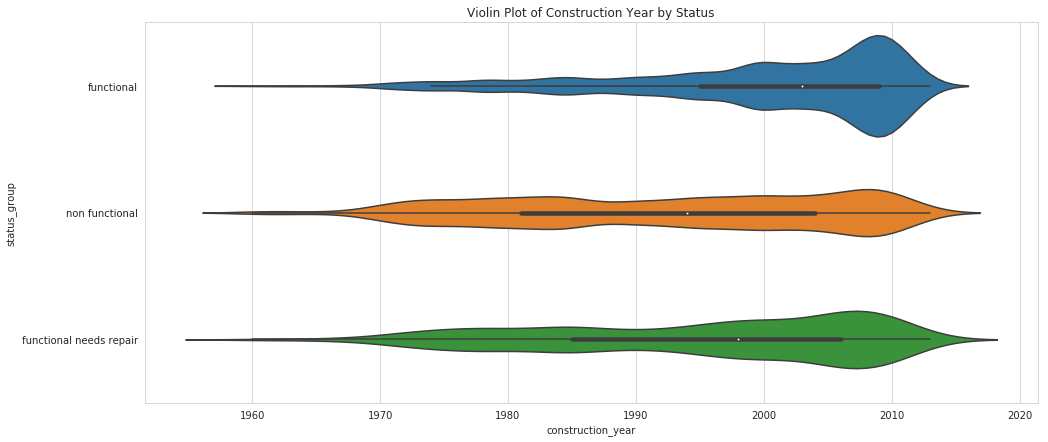

In [8]:
# boxplot construction year vs status
sns.set_style("whitegrid")

plt.figure(figsize = (16, 7))
sns.violinplot(data = full.loc[full['construction_year'] != 0], 
            x = "construction_year", y = "status_group")
plt.title("Violin Plot of Construction Year by Status")
plt.show()

##Based on the above plot, it appears that 'functional' wells are more likely to have been constructed more recently. This makse sense, older wells which have been in operation longer may be more likely to break down and need repairs or stop working altogether.

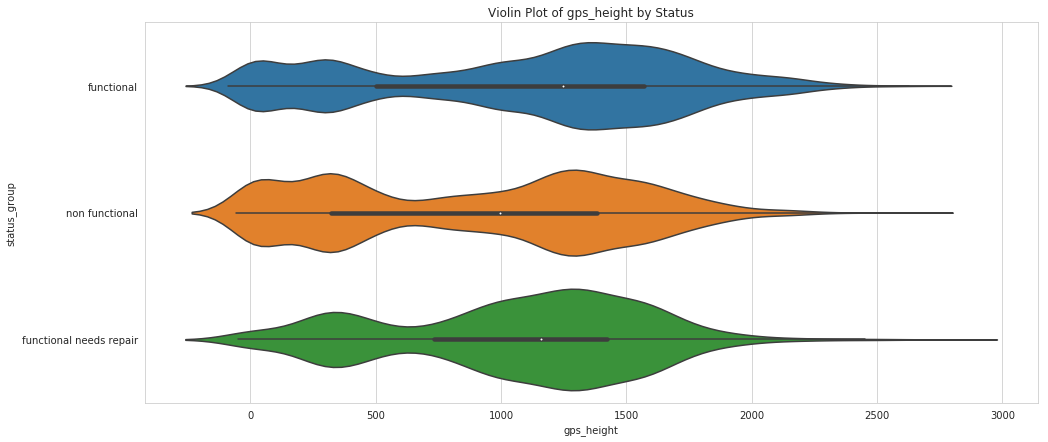

In [9]:
# plot gps_height
plt.figure(figsize = (16, 7))
sns.violinplot(data = full.loc[full["gps_height"] != 0], 
            x = "gps_height", y = "status_group")
plt.title("Violin Plot of gps_height by Status")
plt.show()

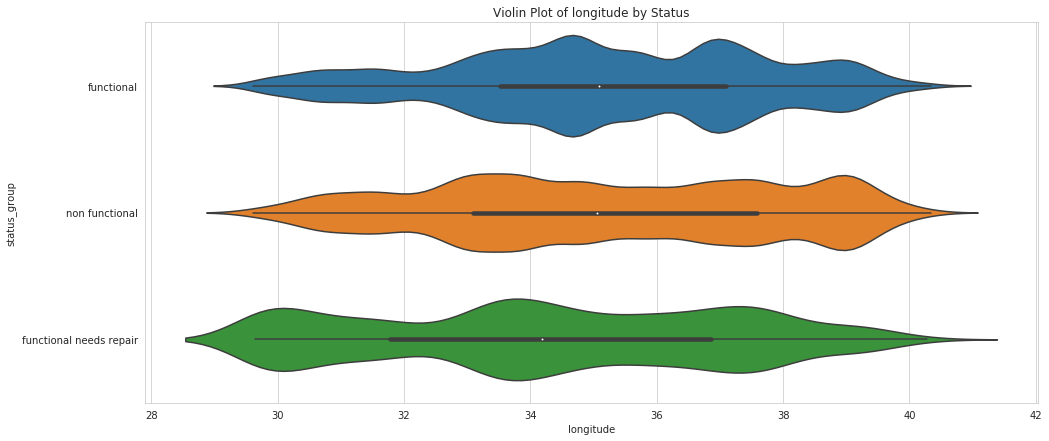

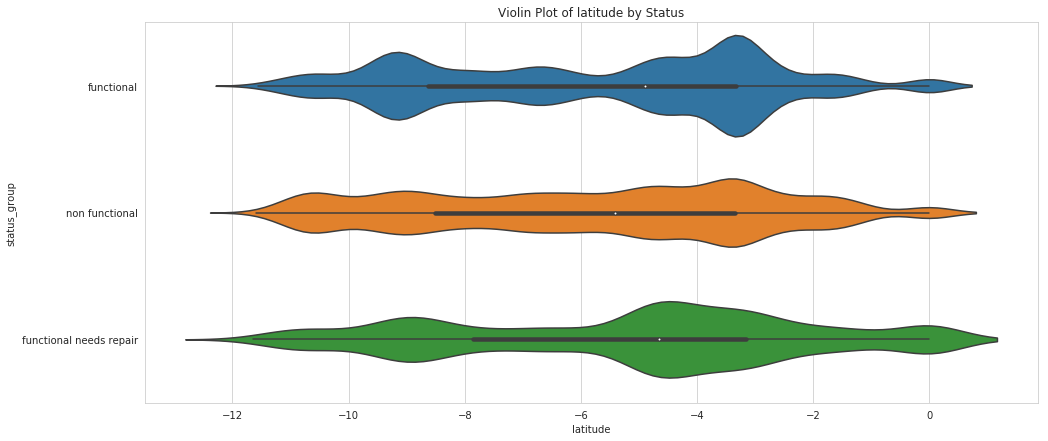

In [10]:
# plot longitude
plt.figure(figsize = (16, 7))
sns.violinplot(data = full.loc[full["longitude"] != 0], 
            x = "longitude", y = "status_group")
plt.title("Violin Plot of Longitude by Status")
plt.show()

# plot latitude
plt.figure(figsize = (16, 7))
sns.violinplot(data = full, 
            x = "latitude", y = "status_group")
plt.title("Violin Plot of Latitude by Status")
plt.show()

##The remaining figures are barplots of the various categorical variables broken down by 'status_group'. Several variables which have far too many factor levels are left out, as well as variables which contain redundant information. For example, 'payment' and 'payment_type' are two variables containing the exact same information.

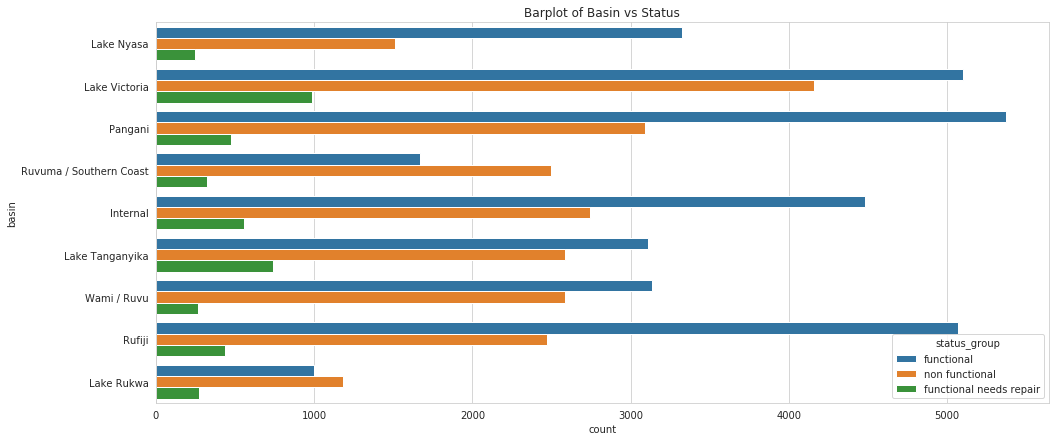

In [29]:
# bar plot of basin
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "basin", hue = "status_group", dodge = True)
plt.title("Barplot of Basin vs Status")
plt.show()

##It appears that several basins have a higher proportion of 'functional' wells (Lake Nyasa, Pangani, Internal, Rufiji), while some show the opposite. Ruvuma and Lake Rukwa have more wells which are 'non functional'.

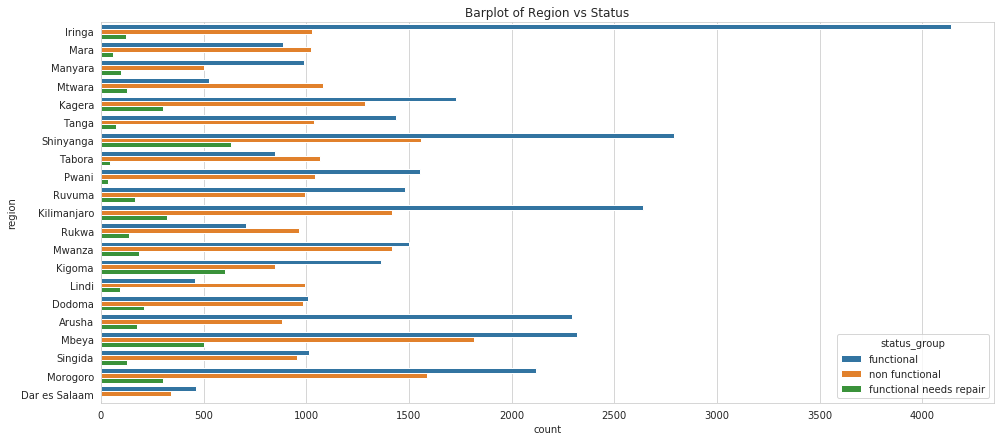

In [30]:
# bar plot of region
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "region", hue = "status_group", dodge = True)
plt.title("Barplot of Region vs Status")
plt.show()

##There are several regions where the wells are more likley to be 'functional' such as Iringa, Shinyanga, Kilimanjaro, Arusha, and several others. The regions Mtwara, Lindi, and a few others are more likely to have 'non functional' wells.

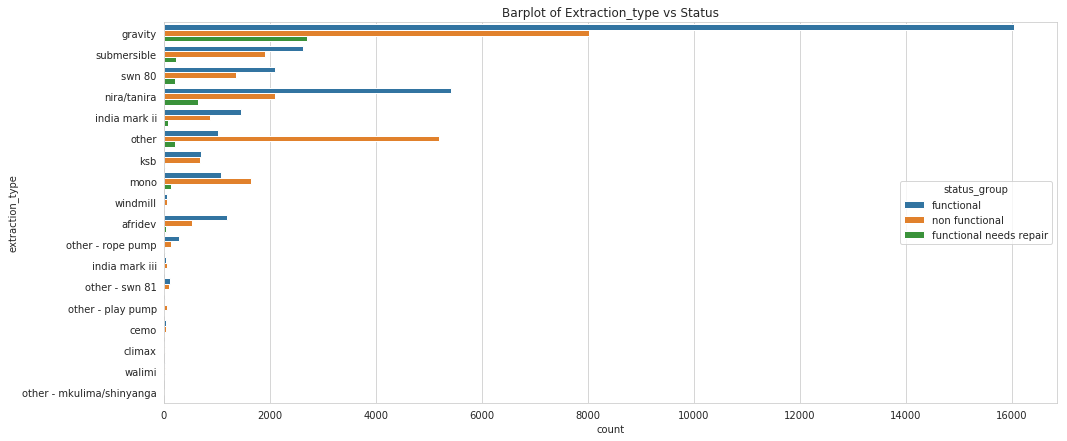

In [31]:
# bar plot of extraction_type
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "extraction_type", hue = "status_group", dodge = True)
plt.title("Barplot of Extraction_type vs Status")
plt.show()

##Wells of with extraction type 'other' and 'mono' are more likely to be non functional, while most other types are more likely to be functional.

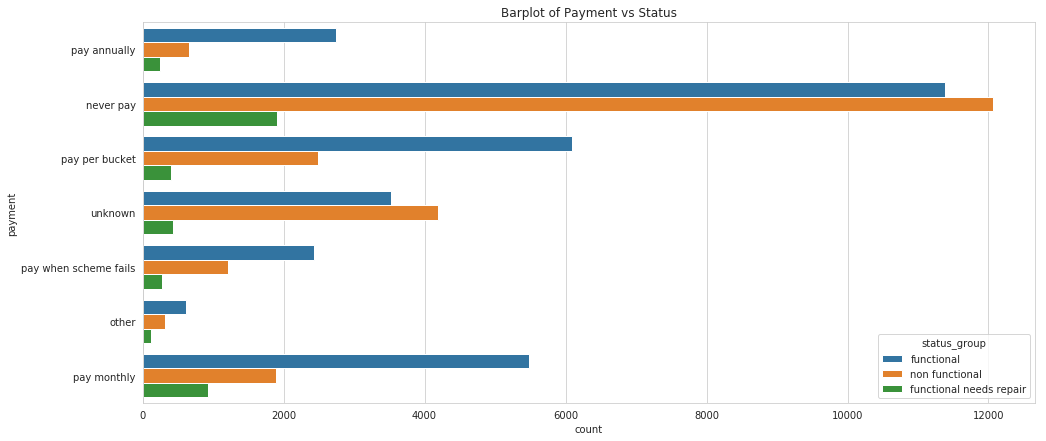

In [32]:
# bar plot of payment
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "payment", hue = "status_group", dodge = True)
plt.title("Barplot of Payment vs Status")
plt.show()

##Wells where people never pay, or where the payment type is unkown are more likely to be non functional.

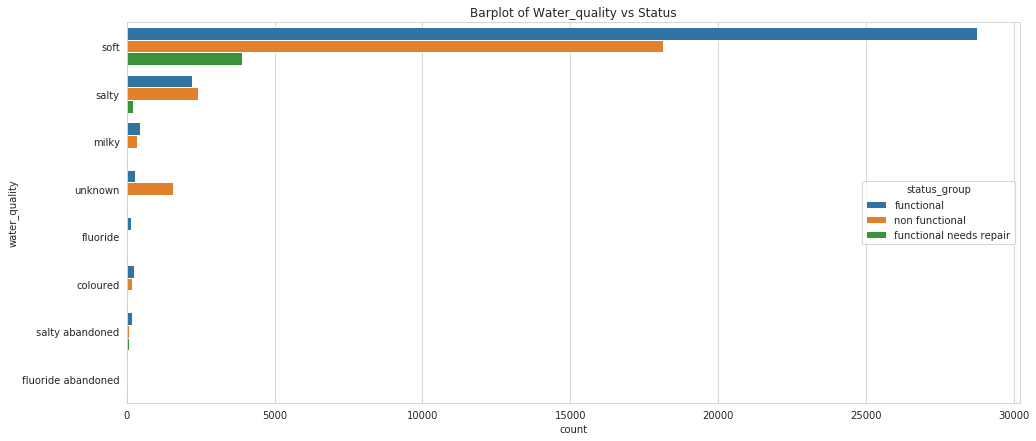

In [33]:
# bar plot of water quality
plt.figure(figsize = (16,7))
sns.countplot(data = full,
              y = "water_quality", hue = "status_group", dodge = True)
plt.title("Barplot of Water_quality vs Status")
plt.show()

##Wells with unknown or salty water type are more likely to be non functional, while most other types (especially soft water) are more likely to be functional.

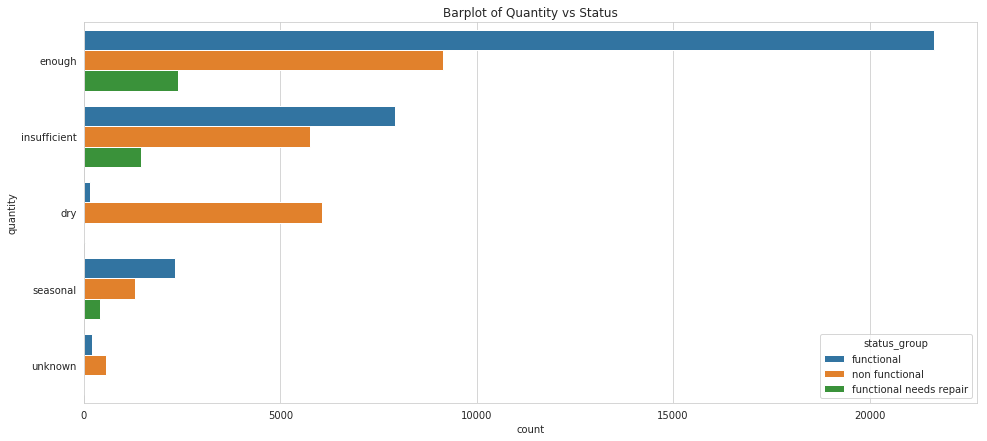

In [34]:
# bar plot of quantity
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "quantity", hue = "status_group", dodge = True)
plt.title("Barplot of Quantity vs Status")
plt.show()

##Wells where the water has dried up are *very* likely to be non functional, and if there's 'enough' water, the well is much more likely to be functional.

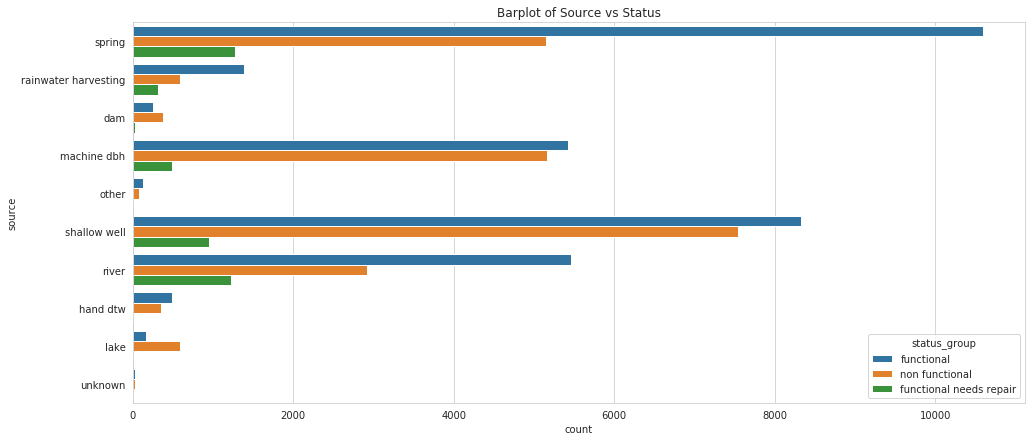

In [35]:
# bar plot of source
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "source", hue = "status_group", dodge = True)
plt.title("Barplot of Source vs Status")
plt.show()

##Spring, rainwater harvesting, and river sources are much more likely to have functional wells, while lake sourced wells are more likely to be non functional.

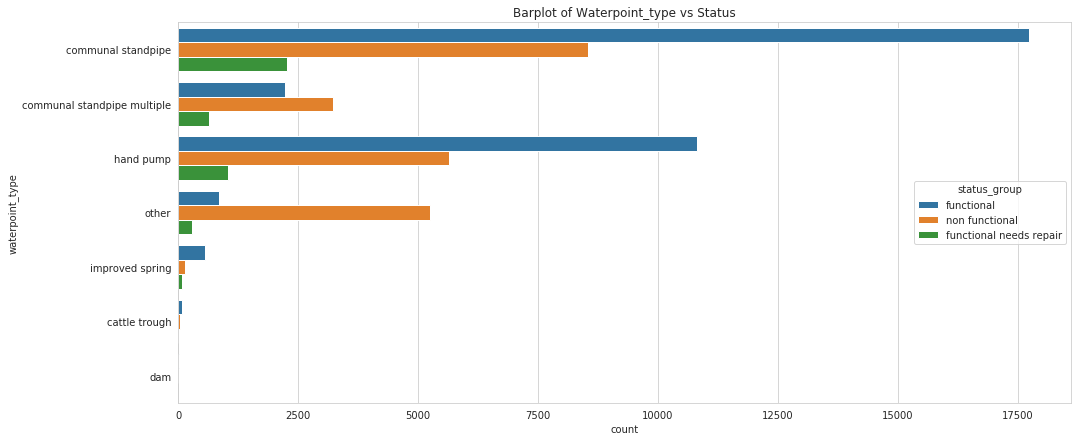

In [36]:
# bar plot of waterpoint_type
plt.figure(figsize = (16,7))
sns.countplot(data = full, y = "waterpoint_type", hue = "status_group", dodge = True)
plt.title("Barplot of Waterpoint_type vs Status")
plt.show()

##Waterpoint_type listed as 'other' is much more likely to be non functional, while communal standpipe and hand pumps are much more likely to be functional.



#Conclusion

##After taking a look at the data, we can start to get a better picture of what factors may help determine which wells are functional or not.  Newer constructed wells may be more likely to be functional, though it's unclear if other numerical features have much impact. Categorical features like the quantity and quality of water, the well's source, the type of payment used, and others including features corresponding to geographic location may help predict whether the well is functional.